In [2]:
import numpy as np
import matplotlib.pyplot as plt
import cv2

img = cv2.imread("ContactLens.tif")#读入图像
#img = img[650: 850, 600: 850]
img = img[250:]
image = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)#将图像转化为灰度图像
#cv2.imshow("Image",image)#显示图像
# cv2.waitKey()
canny = cv2.Canny(image, 30, 150)
# cv2.imshow("Canny",canny)
# cv2.waitKey()
plt.imshow(canny, cmap='gray')
img_array = np.array(canny)
# img_array[400]

CPU times: user 2 µs, sys: 1e+03 ns, total: 3 µs
Wall time: 5.96 µs


True

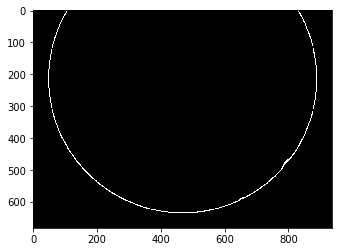

In [3]:
%time
kernel = np.ones((3, 3), np.uint8)  
closing = cv2.morphologyEx(canny, cv2.MORPH_CLOSE, kernel)
plt.imshow(closing, cmap='gray')
# img_array[400]
# cv2.imshow("closing",closing)
# cv2.waitKey()
# cv2.destroyAllWindows()
img_array = np.array(closing)
cv2.imwrite("edge.jpeg", closing)

In [4]:
from scipy.optimize import leastsq
# train_x = np.array([])
# train_y = np.array([])
train_x = []
train_y = []
for i in range(len(img_array)):
    for j in range(len(img_array[0])):
        if(img_array[i][j] == 255):
            train_x.append(i)
            train_y.append(j)

train_x = np.array(train_x)
train_y = np.array(train_y)
len(train_x)

5888

In [5]:
def func(p, x, y):
    x0, y0, R = p
    return (x - x0) ** 2 + (y - y0) ** 2 - (R ** 2)

def error(p, x, y):
    return func(p, x, y) - 0

p0=[100, 100, 100]

para = leastsq(error, p0, args=(train_x, train_y))

x0, y0, R = para[0]
p = [x0, y0, R]
p

[213.80463936508892, 468.4447181379375, 420.0662458211347]

In [6]:
train_x = []
train_y = []
for i in range(len(img_array)):
    for j in range(len(img_array[0])):
        if(img_array[i][j] == 255):
            train_x.append(i)
            train_y.append(j)

In [7]:
import time
from scipy.optimize import leastsq

# train_x = np.array([])
    # train_y = np.array([])
train_x = np.array(train_x)
train_y = np.array(train_y)
def b():
    
    
    

    len(train_x)
    def func(p, x, y):
        x0, y0, R = p
        return (x - x0) ** 2 + (y - y0) ** 2 - (R ** 2)

    def error(p, x, y):
        return func(p, x, y) - 0

    p0=[100, 100, 100]

    para = leastsq(error, p0, args=(train_x, train_y))

    x0, y0, R = para[0]
    p = [x0, y0, R]
    p
start = time.clock()
b()
end = time.clock()
display(end - start)
%timeit b()

0.007201000000000235

4.1 ms ± 92.3 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [10]:
# def a():
    
x0 = 0
y0 = 0
# for i in range(len(img_array)):
#     for j in range(len(img_array[0])):
#         if(img_array[i][j] == 255):
#             x0 += i
#             y0 += j
x0 = train_x.mean()#x0 / len(train_x) #(len(img_array) + len(img_array[0]))
y0 = train_y.mean()#y0 / len(train_y) #(len(img_array) + len(img_array[0]))
#display(x0, y0, (len(img_array) * len(img_array[0])), len(train_x))
R = 420.1324079813983
# %timeit a()
# start = time.clock()
# a()
# end = time.clock()
# display(end - start)
p = [x0, y0, R]

In [11]:
cnt = 0
defect_x = []
defect_y = []

for i in range(len(train_x)):
    # print(i)
    # print(train_y[i])
    # print(abs(func(p, i, train_y[i])))
    if abs(func(p, train_x[i], train_y[i])) > 1800:
        defect_x.append(train_x[i])
        defect_y.append(train_y[i])
len(defect_x)

5826

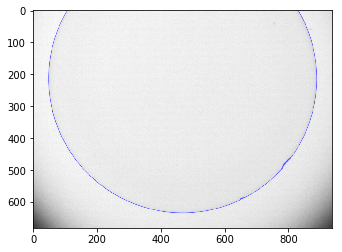

True

In [12]:
for i in range(len(defect_x)):
    img[defect_x[i]][defect_y[i]][2] = 255
#cv2.imshow("after", img)
#cv2.waitKey()
#cv2.destroyAllWindows()
plt.imshow(img)
plt.show()
cv2.imwrite("final.jpeg", img)